# Parsing using NLTK

## I. Grammars

### I.1. Context Free grammar (CFG)

In [1]:
import nltk

exp_cfg = nltk.CFG.fromstring("""
S -> NP VP | VP
VP -> V NP
NP -> DET ADJ N | DET N | PRON
PRON -> 'je' | 'tu' | 'il' | 'elle'
V -> 'forme' | 'veut' | 'mange'
DET -> 'un' | 'une' | 'la' | 'le'
ADJ -> 'petite' | 'grand' | 'bleu' | petit
N -> 'petite' | 'forme' | 'phrase' | 'chat' | 'poisson'
""")

exp_cfg

<Grammar with 26 productions>

In [2]:
exp_cfg.is_binarised(), exp_cfg.is_chomsky_normal_form(), exp_cfg.is_leftcorner('S', 'VP')

(False, False, False)

In [3]:
exp_cfg_bin = nltk.CFG.binarize(exp_cfg, padding='_')

exp_cfg_bin.productions()

[S -> NP VP,
 S -> VP,
 VP -> V NP,
 NP -> DET NP_DET,
 NP_DET -> ADJ N,
 NP -> DET N,
 NP -> PRON,
 PRON -> 'je',
 PRON -> 'tu',
 PRON -> 'il',
 PRON -> 'elle',
 V -> 'forme',
 V -> 'veut',
 V -> 'mange',
 DET -> 'un',
 DET -> 'une',
 DET -> 'la',
 DET -> 'le',
 ADJ -> 'petite',
 ADJ -> 'grand',
 ADJ -> 'bleu',
 ADJ -> petit,
 N -> 'petite',
 N -> 'forme',
 N -> 'phrase',
 N -> 'chat',
 N -> 'poisson']

In [4]:
# flexible=True if you want to save unitary productions
exp_cfg_CNF = exp_cfg.chomsky_normal_form(new_token_padding='_') 

exp_cfg_CNF.productions()

[NP -> 'tu',
 PRON -> 'elle',
 S -> NP VP,
 NP -> DET N,
 DET -> 'un',
 V -> 'veut',
 NP -> 'elle',
 V -> 'forme',
 N -> 'phrase',
 NP_DET -> ADJ N,
 PRON -> 'je',
 VP -> V NP,
 PRON -> 'il',
 ADJ -> 'petite',
 N -> 'forme',
 ADJ -> 'grand',
 DET -> 'une',
 NP -> 'je',
 NP -> 'il',
 NP -> DET NP_DET,
 ADJ -> 'bleu',
 N -> 'poisson',
 S -> V NP,
 PRON -> 'tu',
 DET -> 'la',
 N -> 'petite',
 V -> 'mange',
 N -> 'chat',
 DET -> 'le']

In [5]:
exp_cfg.leftcorners('S')

{'S'}

### I.2. Loading grammars

In [6]:
from nltk.parse.util import load

gram_load = load('grammars/book_grammars/sql0.fcfg')

gram_load

<Grammar with 14 productions>

### I.3. Treebanks

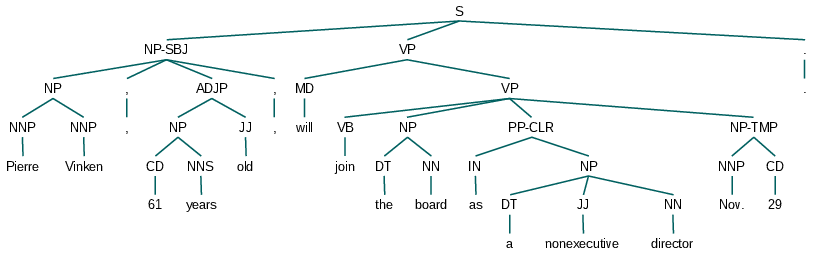

In [7]:
from nltk.corpus import treebank

treebank.parsed_sents('wsj_0001.mrg')[0]

In [8]:
from nltk.corpus.reader import BracketParseCorpusReader

my_treebank = BracketParseCorpusReader('doc', r'k_.*\.mrg', tagset='AAK')

my_treebank.fileids()

['k_01.mrg', 'k_02.mrg']

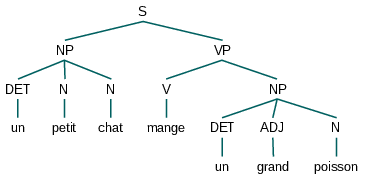

In [9]:
my_treebank.parsed_sents('k_02.mrg')[0]

## II. Parsing

### II.1. Recursive Descent

(S
  (NP (DET la) (N petite))
  (VP (V forme) (NP (DET une) (ADJ petite) (N phrase))))


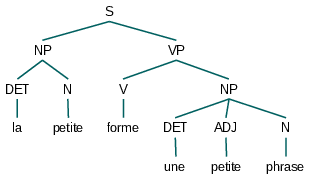

In [10]:
sent = ['la', 'petite', 'forme', 'une', 'petite', 'phrase']
parser = nltk.RecursiveDescentParser(exp_cfg)

for tree in parser.parse(sent):
    print(tree)
    
tree

### II.2. Shift-Reduce

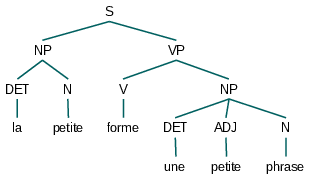

In [11]:
parser = nltk.ShiftReduceParser(exp_cfg)

for tree in parser.parse(sent):
    print(tree)
    
tree

### II.3. Chart

(S
  (NP (DET la) (N petite))
  (VP (V forme) (NP (DET une) (ADJ petite) (N phrase))))


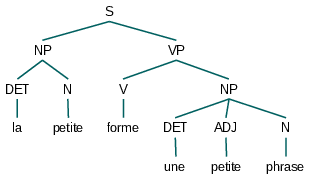

In [12]:
from nltk.parse.earleychart import EarleyChartParser

parser = EarleyChartParser(exp_cfg)

for tree in parser.parse(sent):
    print(tree)
    
tree

(S
  (NP (DET la) (N petite))
  (VP (V forme) (NP (DET une) (ADJ petite) (N phrase))))


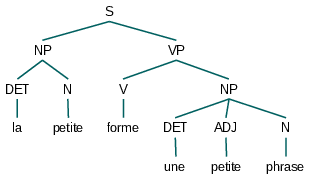

In [13]:
from nltk.parse.chart import BottomUpChartParser

parser = BottomUpChartParser(exp_cfg)

for tree in parser.parse(sent):
    print(tree)
    
tree

## III. Generation

In [14]:
from nltk.parse.generate import generate

list(generate(exp_cfg, n=5))

[['un', 'petite', 'petite', 'forme', 'un', 'petite', 'petite'],
 ['un', 'petite', 'petite', 'forme', 'un', 'petite', 'forme'],
 ['un', 'petite', 'petite', 'forme', 'un', 'petite', 'phrase'],
 ['un', 'petite', 'petite', 'forme', 'un', 'petite', 'chat'],
 ['un', 'petite', 'petite', 'forme', 'un', 'petite', 'poisson']]

In [15]:
len(list(generate(exp_cfg, depth=6)))

21420